<a href="https://colab.research.google.com/github/yacine-yefsah/K-Means_Clustering/blob/main/Clustering_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #2e86c1; padding: 20px; border-radius: 10px;">
    <h1 style="color: white; text-align: center;"> Segmentation par Clustering (K-Means)</h1>
    <p style="color: #ecf0f1; text-align: center;">Master 1 SAAD - Apprentissage Non-Supervisé</p>
</div>

### Objectif
Utiliser l'algorithme K-Means pour regrouper naturellement une population de manchots selon leurs caractéristiques morphologiques (poids et taille du bec), sans utiliser d'étiquettes préalables.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset RÉEL intégré à Seaborn
df_penguins = sns.load_dataset('penguins')

# Nettoyage : Le clustering ne supporte pas les valeurs manquantes (NaN)
df_penguins = df_penguins.dropna()

# On garde les variables numériques pour le clustering (longueur bec et poids)
X = df_penguins[['bill_length_mm', 'body_mass_g']]

print(f"Nombre de manchots à analyser : {len(df_penguins)}")
df_penguins.head()

Nombre de manchots à analyser : 333


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


## Détermination du nombre optimal de clusters
Avant d'entraîner le modèle, nous utilisons la **Méthode du Coude (Elbow Method)**. Elle mesure l'inertie (la distance des points par rapport au centre de leur groupe).

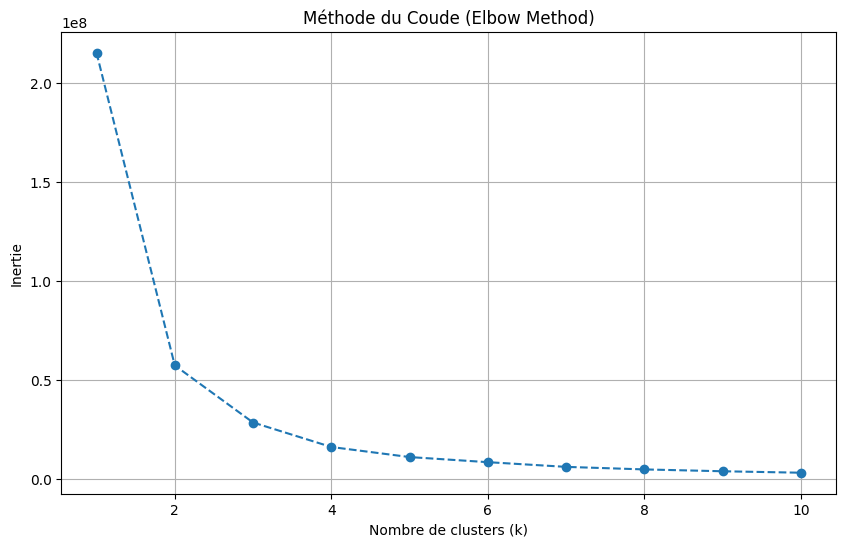

In [4]:
from sklearn.cluster import KMeans

# On calcule l'inertie pour différents nombres de clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

# Visualisation pour trouver le "Coude"
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Méthode du Coude (Elbow Method)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

**On observe une cassure nette au niveau de k=3. Cela indique que diviser la population en 3 groupes est le meilleur compromis entre précision et simplicité.**

## Visualisation de la Segmentation
Le graphique ci-dessous montre les trois groupes identifiés. Les croix rouges représentent les **centroïdes**, c'est-à-dire le profil "moyen" de chaque groupe de manchots.

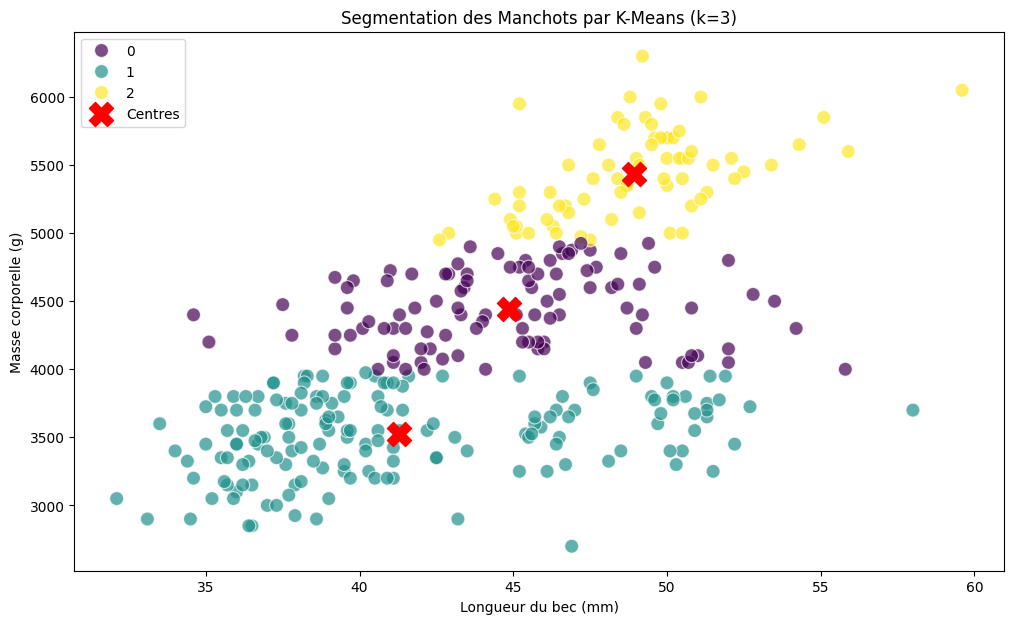

In [6]:
# 1. On applique le K-Means avec k=3 (le point de cassure du coude)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_penguins['cluster'] = kmeans.fit_predict(X)

# 2. Visualisation des clusters
plt.figure(figsize=(12, 7))
sns.scatterplot(x='bill_length_mm', y='body_mass_g', hue='cluster',
                palette='viridis', data=df_penguins, s=100, alpha=0.7)

# 3. Affichage des centres des clusters (les "points moyens" de chaque groupe)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, marker='X', label='Centres')

plt.title('Segmentation des Manchots par K-Means (k=3)')
plt.xlabel('Longueur du bec (mm)')
plt.ylabel('Masse corporelle (g)')
plt.legend()
plt.show()